In [1]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [50]:
def closest_node(point, serie):
    dist_2 = (serie - point)**2
    return np.argmin(dist_2)

In [5]:
pluviometer_dir = '../../pluviometer/pluv_vale_lat_lon.csv'
list_pluviometer = pd.read_csv(pluviometer_dir,sep=';')
len_pluviometer = len(list_pluviometer)
list_pluviometer

,Name,Latitude,Longitude
0,RH-92-PLUVIOMETRO-EFVM,-19.649351,-43.159383
1,RH-84-PLUVIOMETRO-EFVM,-19.956498,-43.286721
2,RH-78-PLUVIOMETRO-EFVM,-19.746002,-43.022259
3,RH-72-PLUVIOMETRO-EFVM,-19.648011,-42.860899
4,RH-60-PLUVIOMETRO-EFVM,-19.313211,-42.362461
5,RH-50-PLUVIOMETRO-EFVM,-18.862691,-41.962364
6,RH-37-PLUVIOMETRO-EFVM,-19.203117,-41.399608
7,RH-23-PLUVIOMETRO-EFVM,-19.542816,-40.689570
8,RH-210V-PLUVIOMETRO-EFVM,-19.873132,-43.778078
9,RH-203-PLUVIOMETRO-EFVM,-19.927519,-43.403119


In [9]:
year = '2020'
IMERG_files = glob.glob('/run/media/arturo/Arturo/Data/IMERG/raw_30min/'+year+'/*.nc4')
IMERG_files = sorted(IMERG_files)
len_IMERG = len(IMERG_files)
print(f'Year {year} has {len_IMERG} files in directory')

Year 2020 has 17568 files in directory


In [88]:
pre_export = None

year = []
month = []
day = []
hour = []
minute = []

for plu in range(len_pluviometer):

    print(plu)

    for nn in range(len_IMERG):

        data = ca.read_netcdf(IMERG_files[nn],0)
        tim = data['time'].data
        pre = data['precipitationCal'][0,:,:].T.data

        if plu == 0:

            yy = tim[0].year
            mm = tim[0].month
            dd = tim[0].day
            hh = tim[0].hour
            mi = tim[0].minute

            year.append(yy)
            month.append(mm)
            day.append(dd)
            hour.append(hh)
            minute.append(mi)

            # print(f'Time file is {yy}-{mm}-{dd} {hh}:{mi}')

        if pre_export is None:

            lat = data['lat'].data
            lon = data['lon'].data

            nlat = len(lat)
            nlon = len(lon)

            pre_export = np.zeros([len_IMERG,len_pluviometer])

        lat_index = closest_node(np.round(list_pluviometer['Latitude'][plu],2), lat)
        lon_index = closest_node(np.round(list_pluviometer['Longitude'][plu],2), lon)

        pre_export[nn,plu] = pre[lat_index,lon_index]

0
1
2
3
4
5
6
7


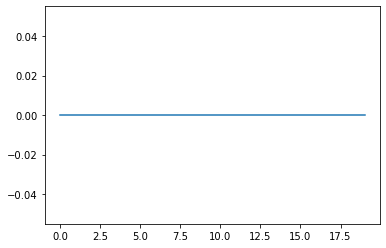

In [87]:
plt.plot(pre_export[:,0])

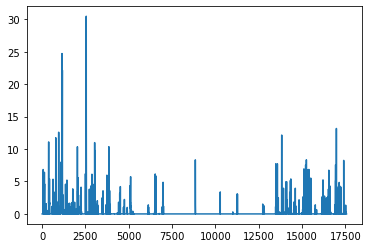

In [76]:
plt.plot(pre_export)